In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

In [104]:
#Load the csv files
full_train_data = pd.read_csv('train.csv')
full_test_data = pd.read_csv('test.csv')

full_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
#features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
# features_train = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
# features_test = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

# full_train_data = full_train_data[features_train]
# full_test_data = full_test_data[features_test]

X = full_train_data.drop(['Survived'],axis =1)
y= full_train_data['Survived']

X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =2) 

In [107]:
#Seperate categorical and numerical columns
categorical_cols = [cols for cols in X_train.columns if
                   X_train[cols].nunique()<10 and
                   X_train[cols].dtypes == 'object']

numerical_cols = [cols for cols in X_train.columns if
                 X_train[cols].dtypes in ['int64','float64']]

features = categorical_cols +numerical_cols
X_train = X_train[features].copy()
X_test = X_test[features].copy()

#Prepare full test data
test_data = full_test_data[features].copy()

In [108]:
#Create the pipeline
numerical_transformer = SimpleImputer(strategy = 'mean')

categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer(
transformers = [
('num',numerical_transformer, numerical_cols),
('cat',categorical_transformer, categorical_cols)])



In [109]:
model = RandomForestRegressor(n_estimators = 100, random_state =1)
lr_model = LinearRegression()
gnb_model = GaussianNB()

In [110]:
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', gnb_model)
])



In [111]:
from sklearn.metrics import mean_absolute_error
pipeline.fit(X_train,y_train)
preds = pipeline.predict(X_test)
score = mean_absolute_error(y_test,preds)
score

0.2346368715083799

In [112]:
#Create a function that will calculate score for RandomForestRegressor with certain n_estimators
from sklearn.model_selection import cross_val_score
def get_score(n_estimators):
    pipeline= Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('model',RandomForestRegressor(n_estimators = n_estimators, random_state =0))
    ])
    
    score = -1 * cross_val_score(pipeline, X_train, y_train, cv =3, scoring = 'neg_mean_absolute_error')
    return score.mean()
    pass

In [113]:
# #Find the ideal number of

# #Optimize the model
# score_results= {}
# for i in range(1,9):
#     score_results[i*50] = get_score(i*50)
# print(score_results)

#Best result is 100

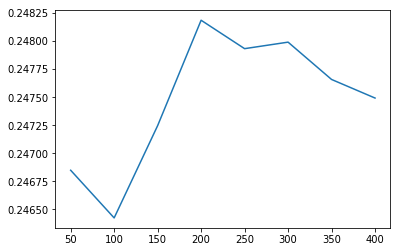

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(score_results.keys(), score_results.values())
plt.show()

In [115]:
preds = pipeline.predict(test_data).round().astype(int)
output = pd.DataFrame({'PassengerId':test_data.PassengerId,
                      'Survived': preds})
output.to_csv('submission.csv',index = False)

In [116]:
output.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
